In [66]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

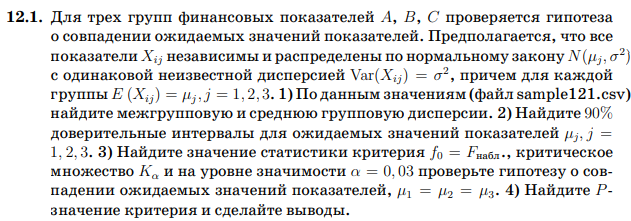

In [67]:
sample = pd.read_csv('sample121.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')

In [68]:
sample.head(13)

,0,1,2
0,0.240756,0.564998,1.830014
1,-1.537147,1.086975,3.524825
2,0.354049,1.079226,-0.259285
3,0.874066,0.176824,3.860822
4,2.272462,0.534980,2.378388
5,0.564473,0.174049,1.571375
6,3.042862,-0.036874,1.649098
7,-0.596701,-1.257823,2.216314
8,4.413431,-0.550854,5.169305
9,2.482038,1.029028,0.294575


In [69]:
A = sample[0].dropna()
B = sample[1].dropna()
C = sample[2].dropna()
A_mean = A.mean()
B_mean = B.mean()
C_mean = C.mean()
Mean = (A.sum() + B.sum() + C.sum()) / (A.size + B.size + C.size)
A_var = A.var(ddof = 0)
B_var = B.var(ddof = 0)
C_var = C.var(ddof = 0)
avg_Var = (A_var * A.size + B_var * B.size + C_var * C.size)/ (A.size + B.size + C.size)
intergroup_Var = ((A_mean - Mean)**2 * A.size + (B_mean - Mean)**2 * B.size + \
                 (C_mean - Mean)**2 * C.size) / (A.size + B.size + C.size)
print(f'Среднегрупповая дисперсия равна {avg_Var}')
print(f'Межгрупповая дисперсия равна {intergroup_Var}')


Среднегрупповая дисперсия равна 2.553429733071954
Межгрупповая дисперсия равна 0.4516834264461737


In [70]:
alpha = 0.1
def confidence_interval(sample, alpha, n):
    k = 3
    MSE = n * avg_Var / (n - k)
    mean = sample.mean()
    upper_border = mean + st.t(n - k).isf(alpha/2) * (MSE/sample.size)**0.5
    lower_border = mean - st.t(n - k).isf(alpha/2) * (MSE/sample.size)**0.5
    return lower_border, upper_border
print(f'Доверительный интервал для A ({confidence_interval(A, alpha, A.size + B.size + C.size)[0]}: {confidence_interval(A, alpha, A.size + B.size + C.size)[1]})')
print(f'Доверительный интервал для B ({confidence_interval(B, alpha, A.size + B.size + C.size)[0]} : {confidence_interval(B, alpha, A.size + B.size + C.size)[1]})')
print(f'Доверительный интервал для C ({confidence_interval(C, alpha, A.size + B.size + C.size)[0]} : {confidence_interval(C, alpha, A.size + B.size + C.size)[1]})')

Доверительный интервал для A (0.7608935299044453: 1.7765407871320538)
Доверительный интервал для B (0.0011040917863092137 : 0.9366496599101128)
Доверительный интервал для C (1.673157134041437 : 2.425709677073053)


In [71]:
alpha = 0.03
k = 3
n = A.size + B.size + C.size 
delta = intergroup_Var
sigma = avg_Var
F_stat = (n - k) * delta / ((k - 1) * sigma)
F = st.f(k - 1, n - k)
pvalue = F.sf(F_stat)
cvalue = F.isf(alpha)
print(f'Значение F-статистики равно {F_stat}, критическое множество [{cvalue}, inf) , p-value = {pvalue}')
print(f'Исходя из всего этого можно сделать вывод, что гипотеза о равенстве трех средних неверна')

Значение F-статистики равно 9.640659549969604, критическое множество [3.621823534571484, inf) , p-value = 0.00013958472886728196
Исходя из всего этого можно сделать вывод, что гипотеза о равенстве трех средних неверна


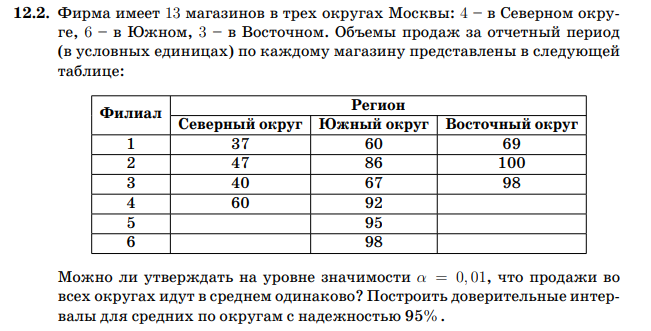

In [72]:
north_district = np.array([37, 47, 40, 60])
south_district = np.array([60, 86, 67, 92, 95, 98])
east_district = np.array([69, 100, 98])
north_var = north_district.var()
south_var = south_district.var()
east_var = east_district.var()
north_mean = north_district.mean()
south_mean = south_district.mean()
east_mean = east_district.mean()
north_size = north_district.size
south_size = south_district.size
east_size = east_district.size
Mean = (north_district.sum() + south_district.sum() + east_district.sum()) / (north_size + south_size + east_size)

In [73]:
avg_Var = (north_var * north_size + south_var * south_size + east_var * east_size)/(north_size + \
                                                                                    south_size + \
                                                                                    east_size)
intergroup_Var = ((north_mean - Mean)**2 * north_size + (south_mean - Mean)**2 * south_size + \
                 (east_mean - Mean)**2 * east_size) / (north_size + south_size + east_size)

In [74]:
alpha = 0.01
k = 3
n = north_size + south_size + east_size 
delta = intergroup_Var
sigma = avg_Var
F_stat = (n - k) * delta / ((k - 1) * sigma)
F = st.f(k - 1, n - k)
pvalue = F.sf(F_stat)
cvalue = F.isf(alpha)
print(f'Значение F-статистики равно {F_stat}, критическое множество [{cvalue}, inf) , p-value = {pvalue}')
print(f'Исходя из всего этого можно сделать вывод, что гипотеза о равенстве трех средних неверна')

Значение F-статистики равно 9.916666666666666, критическое множество [7.559432157547899, inf) , p-value = 0.0042314683517178575
Исходя из всего этого можно сделать вывод, что гипотеза о равенстве трех средних неверна


In [75]:
alpha = 0.05
print(f'Доверительный интервал для Северного округа ({confidence_interval(north_district, alpha, n)[0]} : {confidence_interval(north_district, alpha, n)[1]})')
print(f'Доверительный интервал для Южного округа ({confidence_interval(south_district, alpha, n)[0]} : {confidence_interval(south_district, alpha, n)[1]})')
print(f'Доверительный интервал для Восточного ({confidence_interval(east_district, alpha, n)[0]} : {confidence_interval(east_district, alpha, n)[1]})')

Доверительный интервал для Северного округа (29.62659020984559 : 62.37340979015441)
Доверительный интервал для Южного округа (69.63116688821037 : 96.36883311178963)
Доверительный интервал для Восточного (70.0936149002046 : 107.9063850997954)


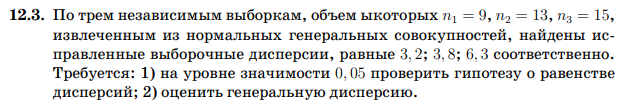

(1.3813607623081094, 5.991464547107983)


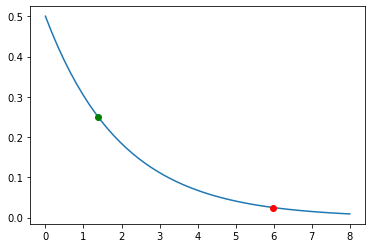

In [130]:
# Bartlett test
alpha = 0.05
k = 3
n1 = 9
n2 = 13
n3 = 15
s1 = 3.2**0.5
s2 = 3.8**0.5
s3 = 6.3**0.5
N = sum([n1 - 1, n2 - 1, n3 - 1]) # т.к параметр матожидания нам неизвестен
s = (1/N * ((n1 - 1) * s1**2 + (n2 - 1) * s2**2 + (n3 - 1) * s3**2))**0.5
gamma = 1 + 1/(3*(k-1)) * ((1/(n1 - 1) + 1/(n2 - 1) + 1/(n3 - 1)) - 1/N)
M = N * np.log(s**2) - ((n1 - 1) * np.log(s1**2) + (n2 - 1) * np.log(s2**2) + (n3 - 1) * np.log(s3**2))
Chi_stat = M / gamma
c_value = st.chi2(k-1).isf(alpha)
c_value
x = np.linspace(0, 8)
plt.plot(x, st.chi2(k-1).pdf(x))
plt.plot(Chi_stat, st.chi2(k-1).pdf(Chi_stat), 'go')
plt.plot(c_value, st.chi2(k-1).pdf(c_value), 'ro');
print(f'{Chi_stat, c_value}')

In [127]:
p_value = st.chi2(k-1).sf(Chi_stat)
print(f'p-value = {p_value}, нулевую гипотезу не отвергаем')

p-value = 0.5012349222294377, нулевую гипотезу не отвергаем


In [131]:
avg_Var = (s1**2 * n1 + s2**2 * n2 + s3**2 * n3)/ (n1 + n2 + n3); avg_Var

4.667567567567567

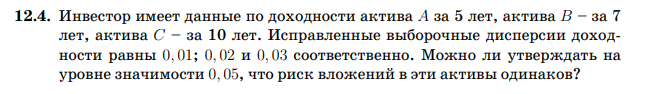

(1.3640475758603445, 5.991464547107983)


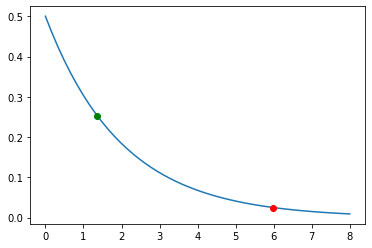

In [128]:
# Bartlett test
alpha = 0.05
k = 3
n1 = 5
n2 = 7
n3 = 10
s1 = 0.01**0.5
s2 = 0.02**0.5
s3 = 0.03**0.5
N = sum([n1 - 1, n2 - 1, n3 - 1]) # т.к параметр матожидания нам неизвестен
s = (1/N * ((n1 - 1) * s1**2 + (n2 - 1) * s2**2 + (n3 - 1) * s3**2))**0.5
gamma = 1 + 1/(3*(k-1)) * ((1/(n1 - 1) + 1/(n2 - 1) + 1/(n3 - 1)) - 1/N)
M = N * np.log(s**2) - ((n1 - 1) * np.log(s1**2) + (n2 - 1) * np.log(s2**2) + (n3 - 1) * np.log(s3**2))
Chi_stat = M / gamma
c_value = st.chi2(k-1).isf(alpha)
c_value
x = np.linspace(0, 8)
plt.plot(x, st.chi2(k-1).pdf(x))
plt.plot(Chi_stat, st.chi2(k-1).pdf(Chi_stat), 'go')
plt.plot(c_value, st.chi2(k-1).pdf(c_value), 'ro');
print(f'{Chi_stat, c_value}')

In [129]:
p_value = st.chi2(k-1).sf(Chi_stat)
print(f'p-value = {p_value}, нулевую гипотезу не отвергаем')

p-value = 0.5055927437917568, нулевую гипотезу не отвергаем
